In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
df = pd.read_csv('BBC News Train.csv')

Accuracy of KNN model: 0.95


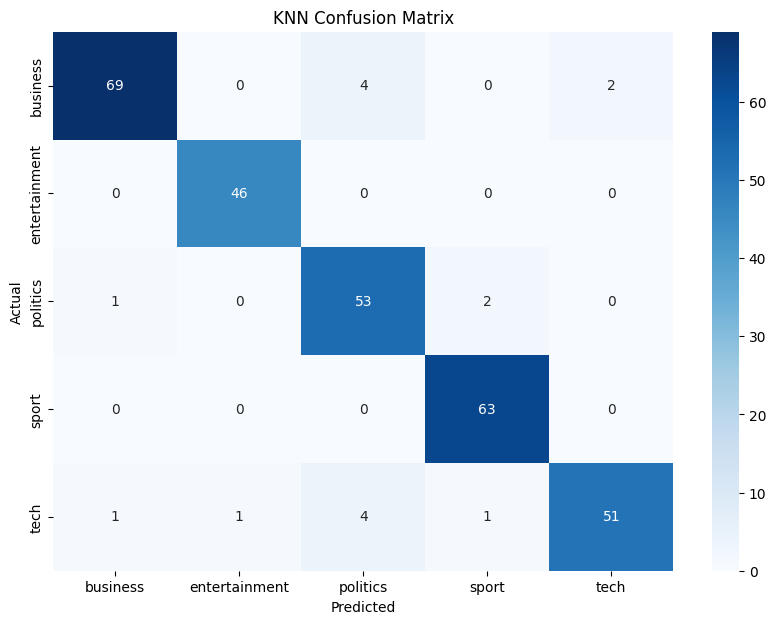

In [ ]:
# KNN supervised learning for classifying categories of articles

X = df['Text']
y = df['Category']
n_features = 1500  # Number of features to consider
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
vectorizer = TfidfVectorizer(max_df=0.8, min_df=4, max_features=n_features,
                             stop_words='english')
tfidf = vectorizer.fit_transform(X_train)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(tfidf, y_train)

# Test the accuracy of the training data on the model
test_tfidf = vectorizer.transform(X_test)
accuracy = knn.score(test_tfidf, y_test)
print(f'Accuracy of KNN model: {accuracy:.2f}')

# Show Confusion Matrix for the model
cm = confusion_matrix(y_test, knn.predict(test_tfidf))
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('KNN Confusion Matrix')
plt.show()
